### Importing the required libraries 

In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt

C:\Users\kalpa\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kalpa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\kalpa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Creating directories for storing the captured images as dataset 

In [2]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_fist")
    os.makedirs("data/train/02_thumbs-up")
    os.makedirs("data/train/03_thumbs-down")
    os.makedirs("data/train/04_no-gesture")

    os.makedirs("data/test")
    os.makedirs("data/test/01_fist")
    os.makedirs("data/test/02_thumbs-up")
    os.makedirs("data/test/03_thumbs-down")
    os.makedirs("data/test/04_no-gesture")

In [3]:
os.listdir('data')

['test', 'train']

In [4]:
os.listdir('data/train')

['01_fist', '02_thumbs-up', '03_thumbs-down', '04_no-gesture']

In [5]:
os.listdir('data/test')

['01_fist', '02_thumbs-up', '03_thumbs-down', '04_no-gesture']

### Enter Mode - Train or Test 

In [6]:
print('Enter mode:')
mode = input()

Enter mode:
train


In [7]:
if mode == 'train':   
    directory = 'data/'+mode+'/'
else:
    directory = 'data/'+mode+'/'

### Capture images for Dataset 

In [27]:
# video capturing starts
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)

    # Getting count of existing images
    count = {
             'fist': len(os.listdir(directory+"/01_fist")),
             'thumbs-up': len(os.listdir(directory+"/02_thumbs-up")),
             'thumbs-down': len(os.listdir(directory+"/03_thumbs-down")),
             'no-gesture': len(os.listdir(directory+"/04_no-gesture")),
            }
    
    # Printing the text on the screen
    cv2.putText(frame, "MODE: "+mode, (10, 50),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,255), 1)
    cv2.putText(frame, "IMAGE COUNT:", (10, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
    cv2.putText(frame, "Raised Fist(1):"+str(count['fist']), (10, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
    cv2.putText(frame, "Thumbs-Up(2):"+str(count['thumbs-up']), (10, 250), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
    cv2.putText(frame, "Thumbs-Down(3):"+str(count['thumbs-down']), (10, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
    cv2.putText(frame, "No gesture(4):"+str(count['no-gesture']), (10, 350), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    
    # Drawing the ROI
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255),3)
    
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))

    cv2.imshow("Collecting data", frame)

    # processing the captured image
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)

    interrupt = cv2.waitKey(10)
    
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'01_fist/'+str(count['fist'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'02_thumbs-up/'+str(count['thumbs-up'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory+'03_thumbs-down/'+str(count['thumbs-down'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory+'04_no-gesture/'+str(count['no-gesture'])+'.jpg', roi)

cap.release()
cv2.destroyAllWindows()

### Gestures in Dataset 

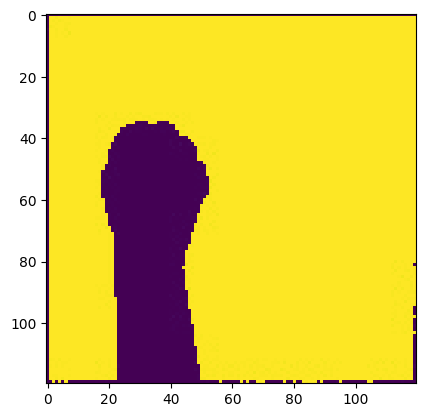

In [9]:
img = Image.open('data\\train\\01_fist\\1.jpg')
plt.imshow(img)

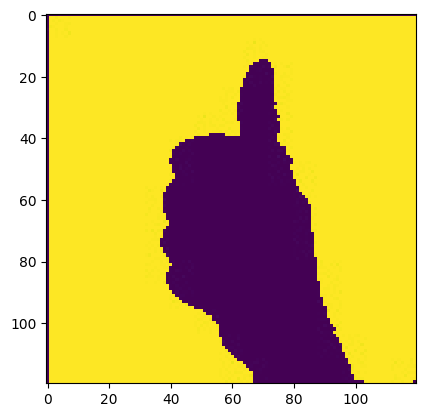

In [10]:
img = Image.open('data\\train\\02_thumbs-up\\1.jpg')
plt.imshow(img)

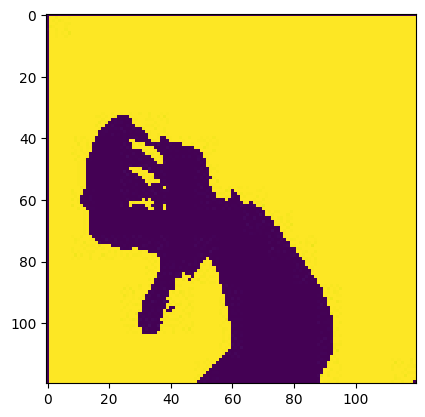

In [11]:
img = Image.open('data\\train\\03_thumbs-down\\1.jpg')
plt.imshow(img)

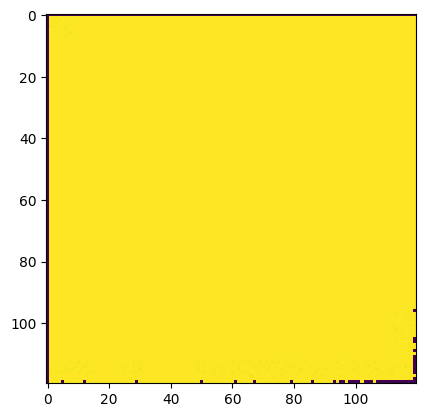

In [12]:
img = Image.open('data\\train\\04_no-gesture\\1.jpg')
plt.imshow(img)

### Training CNN model 

In [13]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

### Building the CNN 

In [14]:
# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [15]:
# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

### Preparing the train/test data and training the model

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        )


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')


Found 436 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [17]:
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),  # Number of batches per epoch
    epochs=20,
    validation_data=test_set,
    validation_steps=len(test_set)  # Number of batches for validation
)


Epoch 1/20
63/63 [==============================] - 5s 76ms/step - loss: 0.7975 - accuracy: 0.7133 - val_loss: 0.3446 - val_accuracy: 0.8750
Epoch 2/20
63/63 [==============================] - 5s 75ms/step - loss: 0.2356 - accuracy: 0.9266 - val_loss: 0.2814 - val_accuracy: 0.9050
Epoch 3/20
63/63 [==============================] - 5s 72ms/step - loss: 0.1259 - accuracy: 0.9564 - val_loss: 0.2174 - val_accuracy: 0.9500
Epoch 4/20
63/63 [==============================] - 5s 73ms/step - loss: 0.0744 - accuracy: 0.9702 - val_loss: 0.2020 - val_accuracy: 0.9350
Epoch 5/20
63/63 [==============================] - 5s 72ms/step - loss: 0.0569 - accuracy: 0.9839 - val_loss: 0.2606 - val_accuracy: 0.9400
Epoch 6/20
63/63 [==============================] - 5s 74ms/step - loss: 0.0621 - accuracy: 0.9771 - val_loss: 0.2397 - val_accuracy: 0.9350
Epoch 7/20
63/63 [==============================] - 5s 77ms/step - loss: 0.0473 - accuracy: 0.9839 - val_loss: 0.1483 - val_accuracy: 0.9550
Epoch 8/20
63

### Test accuracy 

In [18]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

29/29 [==============================] - 0s 13ms/step - loss: 0.2708 - accuracy: 0.9600
Test accuracy: 96.00%


### printing summary

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0

### Result Analysis 

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

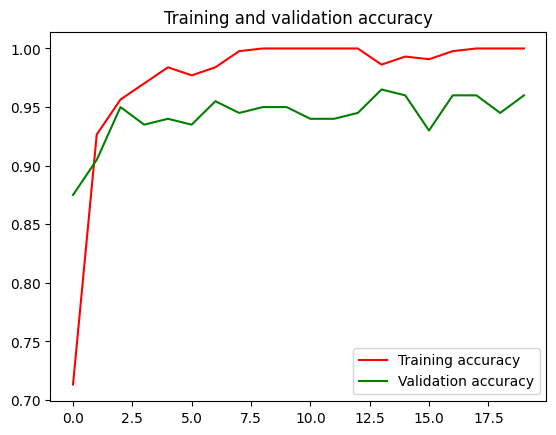

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Saving the model weights 

In [22]:
model_json = model.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('gesture-model.h5')

### Hand Gesture Prediction and volume Control 

In [23]:
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

### Loading the model 

In [24]:
json_file = open("gesture-model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)

# load weights into new model
loaded_model.load_weights("gesture-model.h5")
print("Loaded model from disk")

Loaded model from disk


In [25]:
final_label = ""
action=""

### Final Gesture Detection 

In [29]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    suc,frame = vid.read()
    if suc:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, prediction_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            
            cv2.imshow("prediction Image", prediction_image)
            result = loaded_model.predict(prediction_image.reshape(1, 120, 120, 1))
            prediction = {
                          'fist': result[0][0],
                          'thumbs-up': result[0][1],
                          'thumbs-down': result[0][2],
                          'no-gesture':result[0][3]}
            
            # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION" # No key press is simulated in this case
                
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 255), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()